# LA Course Project - Pratiksha Patil

# Stage 1: Descriptive Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [2]:
courses=pd.read_csv("courses.csv")
assessments = pd.read_csv("assessments.csv")



In [3]:
studentAssessment=pd.read_csv("studentAssessment.csv")

In [4]:
studentInfo=pd.read_csv("studentInfo.csv")

In [5]:
studentRegistration=pd.read_csv("studentRegistration.csv")

In [6]:
studentVle=pd.read_csv("studentVle.csv")
vle=pd.read_csv("vle.csv")

In [7]:
courses.head()



,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [8]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length
0,AAA,2013J,1752,TMA,19.0,10.0,268
1,AAA,2013J,1753,TMA,54.0,20.0,268
2,AAA,2013J,1754,TMA,117.0,20.0,268
3,AAA,2013J,1755,TMA,166.0,20.0,268
4,AAA,2013J,1756,TMA,215.0,30.0,268


In [9]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [10]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [11]:
# Merge assessments and student assessment data
df_inner_assesments_studentAssessment = pd.merge(assessments, studentAssessment, on='id_assessment', how='inner')

In [12]:
df_inner_assesments_studentAssessment.head()


,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,268,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,268,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,268,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,268,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,268,38053,19,0,79.0


In [13]:
# Displaying assessment data of student with id 28400
df_inner_assesments_studentAssessment.loc[df_inner_assesments_studentAssessment['id_student'] == 28400]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_submitted,is_banked,score
1,AAA,2013J,1752,TMA,19.0,10.0,268,28400,22,0,70.0
502,AAA,2013J,1753,TMA,54.0,20.0,268,28400,52,0,68.0
843,AAA,2013J,1754,TMA,117.0,20.0,268,28400,121,0,70.0
1033,AAA,2013J,1755,TMA,166.0,20.0,268,28400,164,0,64.0
1458,AAA,2013J,1756,TMA,215.0,30.0,268,28400,212,0,60.0


In [17]:
# Average Score based on assessment type
df_new1=df_inner_assesments_studentAssessment.groupby('assessment_type')['score'].mean()

In [18]:
df_new1

assessment_type
CMA     81.027053
Exam    65.572898
TMA     72.563392
Name: score, dtype: float64

<AxesSubplot:xlabel='assessment_type'>

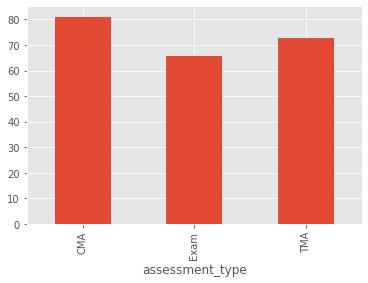

In [19]:
df_new1.plot(x ='assessment_type', y='score', kind = 'bar')

In [24]:
# Pivot table - average score group by code_module,Code_presentation, Assessment_type
table = pd.pivot_table(data=df_inner_assesments_studentAssessment,index=['code_module','code_presentation','assessment_type'],values=['score'], aggfunc=np.mean)
                      
table


score
code_module code_presentation assessment_type           
AAA         2013J             TMA              69.431637
            2014J             TMA              68.598680
BBB         2013B             CMA              88.346207
                              TMA              71.550961
            2013J             CMA              88.079800
                              TMA              71.519185
            2014B             CMA              87.674160
                              TMA              71.831844
            2014J             TMA              65.738172
CCC         2014B             CMA              69.431633
                              Exam             69.970549
                              TMA              73.231097
            2014J             CMA              75.626240
                              Exam             68.234589
                              TMA              75.428571
DDD         2013B             CMA              71.507045
                              Exam             56.353821
                              TMA              69.367474
            2013J             Exam             65.013430
                              TMA              70.231609
            2014B             Exam             69.101145
                              TMA              69.354629
            2014J             Exam             63.308421
                              TMA              72.634236
EEE         2013J             TMA              80.628948
            2014B             TMA              79.745782
            2014J             TMA              82.462349
FFF         2013B             CMA              79.703637
                              TMA              75.882727
            2013J             CMA              79.921329
                              TMA              73.804634
            2014B             CMA              78.570373
                              TMA              74.417170
            2014J             CMA              80.618957
                              TMA              76.390220
GGG         2013J             CMA              87.186983
                              TMA              68.467273
            2014B             CMA              85.746001
                              TMA              69.233079
            2014J             CMA              85.869676
                              TMA              67.605911

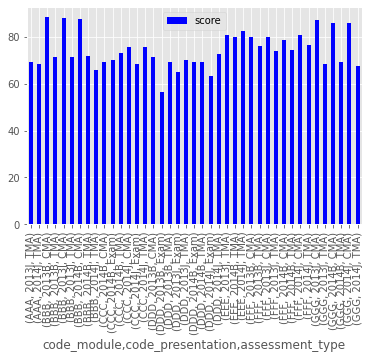

In [25]:
table.plot(kind='bar',color='Blue');

In [26]:
df_sorted= table.sort_values('score')

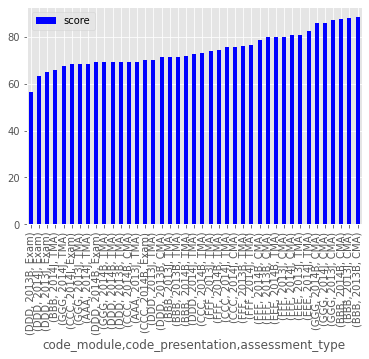

In [27]:
df_sorted.plot(kind='bar',color='Blue');

In [28]:
#vle data
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [29]:
#student vle data
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [30]:
# merge two dataframes -student vle and vle
student_vle_data = pd.merge(studentVle, vle, on='id_site', how='inner')

In [31]:
student_vle_data.tail()

,code_module_x,code_presentation_x,id_student,id_site,date,sum_click,code_module_y,code_presentation_y,activity_type,week_from,week_to
10655275,GGG,2014J,647054,896969,227,8,GGG,2014J,oucontent,NaN,NaN
10655276,GGG,2014J,499187,896969,228,8,GGG,2014J,oucontent,NaN,NaN
10655277,GGG,2014J,629258,896969,228,23,GGG,2014J,oucontent,NaN,NaN
10655278,GGG,2014J,534672,896969,228,1,GGG,2014J,oucontent,NaN,NaN
10655279,GGG,2014J,637476,896969,229,1,GGG,2014J,oucontent,NaN,NaN


In [32]:
# Displaying indivisual student vle data with id =637476
indivisual_student_vle=student_vle_data[student_vle_data['id_student']==637476 ]

In [33]:
indivisual_student_vle

,code_module_x,code_presentation_x,id_student,id_site,date,sum_click,code_module_y,code_presentation_y,activity_type,week_from,week_to
10537967,GGG,2014J,637476,897050,2,1,GGG,2014J,resource,1.0,1.0
10538755,GGG,2014J,637476,897121,2,1,GGG,2014J,resource,1.0,1.0
10539635,GGG,2014J,637476,897076,2,3,GGG,2014J,resource,NaN,NaN
10540125,GGG,2014J,637476,896987,2,1,GGG,2014J,oucontent,NaN,NaN
10540268,GGG,2014J,637476,896987,37,8,GGG,2014J,oucontent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10652490,GGG,2014J,637476,896973,189,4,GGG,2014J,oucontent,NaN,NaN
10652565,GGG,2014J,637476,896966,208,1,GGG,2014J,oucontent,NaN,NaN
10652568,GGG,2014J,637476,896966,209,2,GGG,2014J,oucontent,NaN,NaN
10652590,GGG,2014J,637476,896966,227,3,GGG,2014J,oucontent,NaN,NaN


In [34]:
# date wise no.of visits by student 637476 to different sites
table_ind_vle = pd.pivot_table(indivisual_student_vle,index=['date'],values=['sum_click'], aggfunc=np.sum)
table_ind_vle

,sum_click
date,
2,9
4,5
6,2
9,8
19,21
32,13
35,17
36,7
37,78


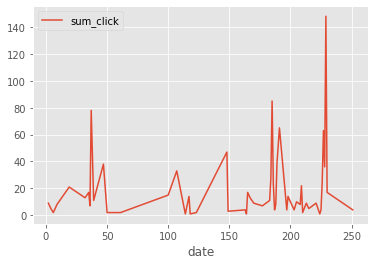

In [35]:
table_ind_vle.plot(kind='line');

In [36]:
# sum of clicks grouped by different activities
table_ind_vle_act = pd.pivot_table(indivisual_student_vle,index=['activity_type'],values=['sum_click'], aggfunc=np.sum)
table_ind_vle_act

,sum_click
activity_type,
forumng,26
glossary,9
homepage,162
oucontent,599
quiz,80
resource,46
subpage,106


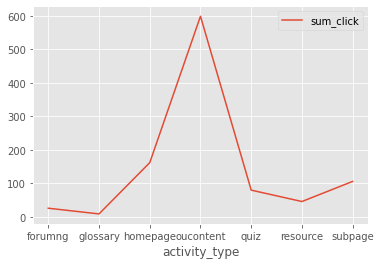

In [37]:
table_ind_vle_act.plot(kind='line');

In [38]:
# pivot table - sum of clicks grouped by code_module and code_presentation 
table_vle = pd.pivot_table(student_vle_data,index=['code_module_x','code_presentation_x'],values=['sum_click'], aggfunc=np.sum)
table_vle

sum_click
code_module_x code_presentation_x           
AAA           2013J                   648494
              2014J                   598158
BBB           2013B                  1347911
              2013J                  1378656
              2014B                   833865
              2014J                  1673744
CCC           2014B                  1889177
              2014J                  2792972
DDD           2013B                  1387467
              2013J                  1757214
              2014B                   947657
              2014J                  1437751
EEE           2013J                  1535953
              2014B                   832038
              2014J                  1616236
FFF           2013B                  4220055
              2013J                  5116439
              2014B                  2975619
              2014J                  5281809
GGG           2013J                   509091
              2014B                   425165
              2014J                   399628

<AxesSubplot:xlabel='code_module_x,code_presentation_x'>

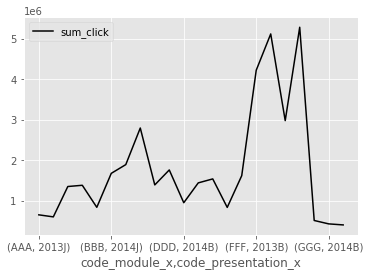

In [39]:
table_vle.plot(kind='line',color='black')

In [40]:
df_sorted_desc= table_vle.sort_values('sum_click',ascending=False)


In [41]:
df_sorted_desc

sum_click
code_module_x code_presentation_x           
FFF           2014J                  5281809
              2013J                  5116439
              2013B                  4220055
              2014B                  2975619
CCC           2014J                  2792972
              2014B                  1889177
DDD           2013J                  1757214
BBB           2014J                  1673744
EEE           2014J                  1616236
              2013J                  1535953
DDD           2014J                  1437751
              2013B                  1387467
BBB           2013J                  1378656
              2013B                  1347911
DDD           2014B                   947657
BBB           2014B                   833865
EEE           2014B                   832038
AAA           2013J                   648494
              2014J                   598158
GGG           2013J                   509091
              2014B                   425165
              2014J                   399628

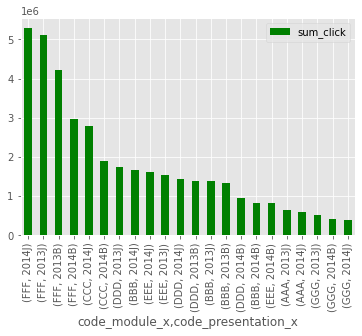

In [42]:
df_sorted_desc.plot(kind='bar',color='g');

In [43]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [44]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [45]:
df_studentInfo_studentAssessment = pd.merge(studentInfo, studentAssessment, on='id_student', how='inner')

In [46]:
df_studentInfo_studentAssessment.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,115,0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755,164,0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756,212,0,82.0


In [47]:
gender_score=df_studentInfo_studentAssessment.groupby('gender')['score'].mean()

<AxesSubplot:xlabel='gender', ylabel='score'>

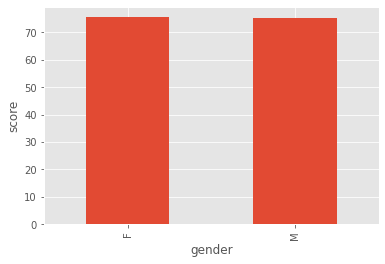

In [48]:
gender_score.plot(kind='bar',xlabel='gender',ylabel='score')

In [49]:
region_score=df_studentInfo_studentAssessment.groupby('region')['score'].mean()

In [50]:
region_score

region
East Anglian Region     75.466897
East Midlands Region    75.448695
Ireland                 75.198544
London Region           74.192893
North Region            77.012322
North Western Region    73.768359
Scotland                76.087426
South East Region       76.874590
South Region            76.025411
South West Region       75.650214
Wales                   75.371863
West Midlands Region    74.722015
Yorkshire Region        74.529785
Name: score, dtype: float64

In [51]:
age_score=df_studentInfo_studentAssessment.groupby('age_band')['score'].mean()

<AxesSubplot:xlabel='Age band', ylabel='score'>

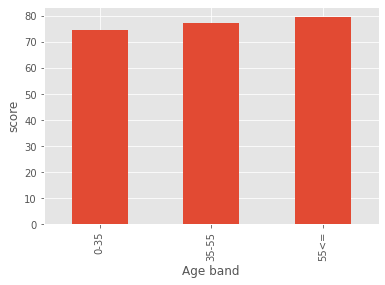

In [52]:
age_score.plot(kind='bar',xlabel='Age band',ylabel='score')

In [53]:
imd_score=df_studentInfo_studentAssessment.groupby('imd_band')['score'].mean()

In [54]:
imd_score

imd_band
0-10%      72.104766
10-20      73.339453
20-30%     74.304187
30-40%     74.883066
40-50%     75.353351
50-60%     75.510884
60-70%     75.898840
70-80%     75.838700
80-90%     77.449577
90-100%    77.739800
Name: score, dtype: float64

In [55]:
table_region_cp_score = pd.pivot_table(df_studentInfo_studentAssessment,index=['region','code_presentation'],values=['score'], aggfunc=np.mean)
table_region_cp_score

score
region               code_presentation           
East Anglian Region  2013B              74.995967
                     2013J              76.291794
                     2014B              75.033993
                     2014J              75.302268
East Midlands Region 2013B              75.899785
                     2013J              75.826967
                     2014B              74.687947
                     2014J              75.518979
Ireland              2013B              75.710859
                     2013J              75.528884
                     2014B              75.503659
                     2014J              74.408275
London Region        2013B              73.253904
                     2013J              74.556684
                     2014B              73.489256
                     2014J              75.039489
North Region         2013B              77.172596
                     2013J              76.309042
                     2014B              75.814114
                     2014J              78.277927
North Western Region 2013B              73.078628
                     2013J              74.416612
                     2014B              73.800620
                     2014J              73.548479
Scotland             2013B              75.302911
                     2013J              76.757519
                     2014B              75.980176
                     2014J              75.968398
South East Region    2013B              76.858891
                     2013J              78.257583
                     2014B              77.437032
                     2014J              75.180076
South Region         2013B              76.676590
                     2013J              76.301582
                     2014B              76.578712
                     2014J              74.914203
South West Region    2013B              76.182306
                     2013J              76.172833
                     2014B              75.842869
                     2014J              74.765702
Wales                2013B              75.913861
                     2013J              75.843645
                     2014B              75.635424
                     2014J              74.469830
West Midlands Region 2013B              74.408385
                     2013J              75.513489
                     2014B              74.702844
                     2014J              74.152913
Yorkshire Region     2013B              76.147005
                     2013J              75.247274
                     2014B              73.339692
                     2014J              73.863915

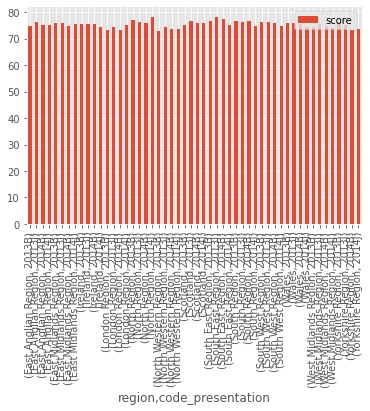

In [56]:
table_region_cp_score.plot(kind='bar');

# Stage 2 - Feature Engineering for prediction of final results

Extracting assessment features (average CMA, TMA and Exam score) and vle features (activity wise sum of click and no.of visits)

In [67]:
data_pivot= pd.pivot_table(data=df_inner_assesments_studentAssessment,index=['id_student','code_module','code_presentation','assessment_type'],values=['score'], aggfunc=np.mean)
data_pivot.fillna(0, inplace=True)
data_pivot.reset_index( inplace=True)
data2_pivot= pd.pivot_table(data=student_vle_data ,index=['id_student','code_module','code_presentation','activity_type'],values=['sum_click'], aggfunc=np.sum)
data2_pivot.fillna(0, inplace=True)
data2_pivot.reset_index( inplace=True)
all_data = pd.merge(data_pivot, data2_pivot, 'left', on = ["id_student", "code_module", "code_presentation"] )

In [68]:
all_data.head()

,id_student,code_module,code_presentation,assessment_type,score,activity_type,sum_click
0,6516,AAA,2014J,TMA,61.8,dataplus,21.0
1,6516,AAA,2014J,TMA,61.8,forumng,451.0
2,6516,AAA,2014J,TMA,61.8,homepage,497.0
3,6516,AAA,2014J,TMA,61.8,oucontent,1505.0
4,6516,AAA,2014J,TMA,61.8,resource,31.0


In [69]:
data_pivot.head()

,id_student,code_module,code_presentation,assessment_type,score
0,6516,AAA,2014J,TMA,61.800000
1,8462,DDD,2013J,TMA,87.666667
2,8462,DDD,2014J,TMA,86.500000
3,11391,AAA,2013J,TMA,82.000000
4,23629,BBB,2013B,CMA,100.000000


# Reshaping and combining assessment ,vle and demographic features

In [70]:
ass = data_pivot.pivot(index=['id_student','code_module','code_presentation'], columns='assessment_type', values='score')

In [71]:
ass.head()

assessment_type                             CMA  Exam        TMA
id_student code_module code_presentation                        
6516       AAA         2014J                NaN   NaN  61.800000
8462       DDD         2013J                NaN   NaN  87.666667
                       2014J                NaN   NaN  86.500000
11391      AAA         2013J                NaN   NaN  82.000000
23629      BBB         2013B              100.0   NaN  65.000000

In [72]:
vle = data2_pivot.pivot(index=['id_student','code_module','code_presentation'], columns='activity_type', values='sum_click')

In [73]:
vle.head()

activity_type                             dataplus  dualpane  externalquiz  \
id_student code_module code_presentation                                     
6516       AAA         2014J                  21.0       NaN           NaN   
8462       DDD         2013J                   NaN       NaN          12.0   
                       2014J                   NaN       NaN           NaN   
11391      AAA         2013J                   NaN       NaN           NaN   
23629      BBB         2013B                   NaN       NaN           NaN   

activity_type                             folder  forumng  glossary  homepage  \
id_student code_module code_presentation                                        
6516       AAA         2014J                 NaN    451.0       NaN     497.0   
8462       DDD         2013J                 NaN     36.0       NaN     184.0   
                       2014J                 NaN      2.0       NaN       7.0   
11391      AAA         2013J                 NaN    193.0       NaN     138.0   
23629      BBB         2013B                 NaN     87.0       NaN      36.0   

activity_type                             htmlactivity  oucollaborate  \
id_student code_module code_presentation                                
6516       AAA         2014J                       NaN            NaN   
8462       DDD         2013J                       NaN           12.0   
                       2014J                       NaN            1.0   
11391      AAA         2013J                       NaN            NaN   
23629      BBB         2013B                       NaN            NaN   

activity_type                             oucontent  ouelluminate  ouwiki  \
id_student code_module code_presentation                                    
6516       AAA         2014J                 1505.0           NaN     NaN   
8462       DDD         2013J                   64.0           NaN    18.0   
                       2014J                    NaN           NaN     NaN   
11391      AAA         2013J                  553.0           NaN     NaN   
23629      BBB         2013B                    NaN           NaN     NaN   

activity_type                             page  questionnaire  quiz  \
id_student code_module code_presentation                              
6516       AAA         2014J               NaN            NaN   NaN   
8462       DDD         2013J               NaN            NaN   NaN   
                       2014J               NaN            NaN   NaN   
11391      AAA         2013J               NaN            NaN   NaN   
23629      BBB         2013B               NaN            NaN  31.0   

activity_type                             repeatactivity  resource  \
id_student code_module code_presentation                             
6516       AAA         2014J                         NaN      31.0   
8462       DDD         2013J                         NaN      70.0   
                       2014J                         NaN       NaN   
11391      AAA         2013J                         NaN      13.0   
23629      BBB         2013B                         NaN       2.0   

activity_type                             sharedsubpage  subpage    url  
id_student code_module code_presentation                                 
6516       AAA         2014J                        NaN    143.0  143.0  
8462       DDD         2013J                        NaN    227.0   23.0  
                       2014J                        NaN      NaN    NaN  
11391      AAA         2013J                        NaN     32.0    5.0  
23629      BBB         2013B                        NaN      5.0    NaN

In [74]:
all_new_data = pd.merge(vle, ass, 'inner', on = ["id_student", "code_module", "code_presentation"] )

In [75]:
all_new_data.head()

dataplus  dualpane  externalquiz  \
id_student code_module code_presentation                                     
6516       AAA         2014J                  21.0       NaN           NaN   
8462       DDD         2013J                   NaN       NaN          12.0   
                       2014J                   NaN       NaN           NaN   
11391      AAA         2013J                   NaN       NaN           NaN   
23629      BBB         2013B                   NaN       NaN           NaN   

                                          folder  forumng  glossary  homepage  \
id_student code_module code_presentation                                        
6516       AAA         2014J                 NaN    451.0       NaN     497.0   
8462       DDD         2013J                 NaN     36.0       NaN     184.0   
                       2014J                 NaN      2.0       NaN       7.0   
11391      AAA         2013J                 NaN    193.0       NaN     138.0   
23629      BBB         2013B                 NaN     87.0       NaN      36.0   

                                          htmlactivity  oucollaborate  \
id_student code_module code_presentation                                
6516       AAA         2014J                       NaN            NaN   
8462       DDD         2013J                       NaN           12.0   
                       2014J                       NaN            1.0   
11391      AAA         2013J                       NaN            NaN   
23629      BBB         2013B                       NaN            NaN   

                                          oucontent  ...  questionnaire  quiz  \
id_student code_module code_presentation             ...                        
6516       AAA         2014J                 1505.0  ...            NaN   NaN   
8462       DDD         2013J                   64.0  ...            NaN   NaN   
                       2014J                    NaN  ...            NaN   NaN   
11391      AAA         2013J                  553.0  ...            NaN   NaN   
23629      BBB         2013B                    NaN  ...            NaN  31.0   

                                          repeatactivity  resource  \
id_student code_module code_presentation                             
6516       AAA         2014J                         NaN      31.0   
8462       DDD         2013J                         NaN      70.0   
                       2014J                         NaN       NaN   
11391      AAA         2013J                         NaN      13.0   
23629      BBB         2013B                         NaN       2.0   

                                          sharedsubpage  subpage    url  \
id_student code_module code_presentation                                  
6516       AAA         2014J                        NaN    143.0  143.0   
8462       DDD         2013J                        NaN    227.0   23.0   
                       2014J                        NaN      NaN    NaN   
11391      AAA         2013J                        NaN     32.0    5.0   
23629      BBB         2013B                        NaN      5.0    NaN   

                                            CMA  Exam        TMA  
id_student code_module code_presentation                          
6516       AAA         2014J                NaN   NaN  61.800000  
8462       DDD         2013J                NaN   NaN  87.666667  
                       2014J                NaN   NaN  86.500000  
11391      AAA         2013J                NaN   NaN  82.000000  
23629      BBB         2013B              100.0   NaN  65.000000  

[5 rows x 23 columns]

In [76]:
all_new_data.fillna(0, inplace=True)

In [77]:
all_new_data.head()

dataplus  dualpane  externalquiz  \
id_student code_module code_presentation                                     
6516       AAA         2014J                  21.0       0.0           0.0   
8462       DDD         2013J                   0.0       0.0          12.0   
                       2014J                   0.0       0.0           0.0   
11391      AAA         2013J                   0.0       0.0           0.0   
23629      BBB         2013B                   0.0       0.0           0.0   

                                          folder  forumng  glossary  homepage  \
id_student code_module code_presentation                                        
6516       AAA         2014J                 0.0    451.0       0.0     497.0   
8462       DDD         2013J                 0.0     36.0       0.0     184.0   
                       2014J                 0.0      2.0       0.0       7.0   
11391      AAA         2013J                 0.0    193.0       0.0     138.0   
23629      BBB         2013B                 0.0     87.0       0.0      36.0   

                                          htmlactivity  oucollaborate  \
id_student code_module code_presentation                                
6516       AAA         2014J                       0.0            0.0   
8462       DDD         2013J                       0.0           12.0   
                       2014J                       0.0            1.0   
11391      AAA         2013J                       0.0            0.0   
23629      BBB         2013B                       0.0            0.0   

                                          oucontent  ...  questionnaire  quiz  \
id_student code_module code_presentation             ...                        
6516       AAA         2014J                 1505.0  ...            0.0   0.0   
8462       DDD         2013J                   64.0  ...            0.0   0.0   
                       2014J                    0.0  ...            0.0   0.0   
11391      AAA         2013J                  553.0  ...            0.0   0.0   
23629      BBB         2013B                    0.0  ...            0.0  31.0   

                                          repeatactivity  resource  \
id_student code_module code_presentation                             
6516       AAA         2014J                         0.0      31.0   
8462       DDD         2013J                         0.0      70.0   
                       2014J                         0.0       0.0   
11391      AAA         2013J                         0.0      13.0   
23629      BBB         2013B                         0.0       2.0   

                                          sharedsubpage  subpage    url  \
id_student code_module code_presentation                                  
6516       AAA         2014J                        0.0    143.0  143.0   
8462       DDD         2013J                        0.0    227.0   23.0   
                       2014J                        0.0      0.0    0.0   
11391      AAA         2013J                        0.0     32.0    5.0   
23629      BBB         2013B                        0.0      5.0    0.0   

                                            CMA  Exam        TMA  
id_student code_module code_presentation                          
6516       AAA         2014J                0.0   0.0  61.800000  
8462       DDD         2013J                0.0   0.0  87.666667  
                       2014J                0.0   0.0  86.500000  
11391      AAA         2013J                0.0   0.0  82.000000  
23629      BBB         2013B              100.0   0.0  65.000000  

[5 rows x 23 columns]

In [78]:
OULAD_features = pd.merge(studentInfo, all_new_data, on='id_student', how='inner')

In [79]:
OULAD_features.head()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,CMA,Exam,TMA
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,13.0,0.0,32.0,5.0,0.0,0.0,82.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,12.0,0.0,87.0,48.0,0.0,0.0,66.4
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.0,0.0,0.0,19.0,0.0,144.0,90.0,0.0,0.0,76.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,45.0,0.0,79.0,14.0,0.0,0.0,54.4
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,...,0.0,0.0,0.0,11.0,0.0,91.0,45.0,0.0,0.0,68.0


In [80]:
#OULAD_features.to_csv('D:\Pratiksha\LA Course Project\OULAD_extracted_features.csv')

In [85]:
data3_pivot= pd.pivot_table(data=student_vle_data ,index=['id_student','code_module','code_presentation','activity_type'],values=['date'], aggfunc=len,
margins=True)
data3_pivot.fillna(0, inplace=True)
data3_pivot.reset_index( inplace=True)

In [86]:
data3_pivot.head()

,id_student,code_module,code_presentation,activity_type,date
0,6516,AAA,2014J,dataplus,4
1,6516,AAA,2014J,forumng,175
2,6516,AAA,2014J,homepage,158
3,6516,AAA,2014J,oucontent,184
4,6516,AAA,2014J,resource,19


In [87]:
no_of_visits = data3_pivot.pivot(index=['id_student','code_module','code_presentation'], columns='activity_type', values='date')
no_of_visits.head()

activity_type                                 dataplus  dualpane  \
id_student code_module code_presentation                           
6516       AAA         2014J             NaN       4.0       NaN   
8462       DDD         2013J             NaN       NaN       NaN   
                       2014J             NaN       NaN       NaN   
11391      AAA         2013J             NaN       NaN       NaN   
23629      BBB         2013B             NaN       NaN       NaN   

activity_type                             externalquiz  folder  forumng  \
id_student code_module code_presentation                                  
6516       AAA         2014J                       NaN     NaN    175.0   
8462       DDD         2013J                       9.0     NaN     19.0   
                       2014J                       NaN     NaN      2.0   
11391      AAA         2013J                       NaN     NaN     52.0   
23629      BBB         2013B                       NaN     NaN     24.0   

activity_type                             glossary  homepage  htmlactivity  \
id_student code_module code_presentation                                     
6516       AAA         2014J                   NaN     158.0           NaN   
8462       DDD         2013J                   NaN      52.0           NaN   
                       2014J                   NaN       1.0           NaN   
11391      AAA         2013J                   NaN      40.0           NaN   
23629      BBB         2013B                   NaN      16.0           NaN   

activity_type                             oucollaborate  ...  ouelluminate  \
id_student code_module code_presentation                 ...                 
6516       AAA         2014J                        NaN  ...           NaN   
8462       DDD         2013J                        7.0  ...           NaN   
                       2014J                        1.0  ...           NaN   
11391      AAA         2013J                        NaN  ...           NaN   
23629      BBB         2013B                        NaN  ...           NaN   

activity_type                             ouwiki  page  questionnaire  quiz  \
id_student code_module code_presentation                                      
6516       AAA         2014J                 NaN   NaN            NaN   NaN   
8462       DDD         2013J                 5.0   NaN            NaN   NaN   
                       2014J                 NaN   NaN            NaN   NaN   
11391      AAA         2013J                 NaN   NaN            NaN   NaN   
23629      BBB         2013B                 NaN   NaN            NaN  15.0   

activity_type                             repeatactivity  resource  \
id_student code_module code_presentation                             
6516       AAA         2014J                         NaN      19.0   
8462       DDD         2013J                         NaN      51.0   
                       2014J                         NaN       NaN   
11391      AAA         2013J                         NaN      11.0   
23629      BBB         2013B                         NaN       2.0   

activity_type                             sharedsubpage  subpage   url  
id_student code_module code_presentation                                
6516       AAA         2014J                        NaN     73.0  49.0  
8462       DDD         2013J                        NaN    114.0  17.0  
                       2014J                        NaN      NaN   NaN  
11391      AAA         2013J                        NaN     11.0   4.0  
23629      BBB         2013B                        NaN      2.0   NaN  

[5 rows x 21 columns]

In [88]:
no_of_visits.fillna(0, inplace=True)
no_of_visits.head()

activity_type                                  dataplus  dualpane  \
id_student code_module code_presentation                            
6516       AAA         2014J              0.0       4.0       0.0   
8462       DDD         2013J              0.0       0.0       0.0   
                       2014J              0.0       0.0       0.0   
11391      AAA         2013J              0.0       0.0       0.0   
23629      BBB         2013B              0.0       0.0       0.0   

activity_type                             externalquiz  folder  forumng  \
id_student code_module code_presentation                                  
6516       AAA         2014J                       0.0     0.0    175.0   
8462       DDD         2013J                       9.0     0.0     19.0   
                       2014J                       0.0     0.0      2.0   
11391      AAA         2013J                       0.0     0.0     52.0   
23629      BBB         2013B                       0.0     0.0     24.0   

activity_type                             glossary  homepage  htmlactivity  \
id_student code_module code_presentation                                     
6516       AAA         2014J                   0.0     158.0           0.0   
8462       DDD         2013J                   0.0      52.0           0.0   
                       2014J                   0.0       1.0           0.0   
11391      AAA         2013J                   0.0      40.0           0.0   
23629      BBB         2013B                   0.0      16.0           0.0   

activity_type                             oucollaborate  ...  ouelluminate  \
id_student code_module code_presentation                 ...                 
6516       AAA         2014J                        0.0  ...           0.0   
8462       DDD         2013J                        7.0  ...           0.0   
                       2014J                        1.0  ...           0.0   
11391      AAA         2013J                        0.0  ...           0.0   
23629      BBB         2013B                        0.0  ...           0.0   

activity_type                             ouwiki  page  questionnaire  quiz  \
id_student code_module code_presentation                                      
6516       AAA         2014J                 0.0   0.0            0.0   0.0   
8462       DDD         2013J                 5.0   0.0            0.0   0.0   
                       2014J                 0.0   0.0            0.0   0.0   
11391      AAA         2013J                 0.0   0.0            0.0   0.0   
23629      BBB         2013B                 0.0   0.0            0.0  15.0   

activity_type                             repeatactivity  resource  \
id_student code_module code_presentation                             
6516       AAA         2014J                         0.0      19.0   
8462       DDD         2013J                         0.0      51.0   
                       2014J                         0.0       0.0   
11391      AAA         2013J                         0.0      11.0   
23629      BBB         2013B                         0.0       2.0   

activity_type                             sharedsubpage  subpage   url  
id_student code_module code_presentation                                
6516       AAA         2014J                        0.0     73.0  49.0  
8462       DDD         2013J                        0.0    114.0  17.0  
                       2014J                        0.0      0.0   0.0  
11391      AAA         2013J                        0.0     11.0   4.0  
23629      BBB         2013B                        0.0      2.0   0.0  

[5 rows x 21 columns]

In [89]:
final_feature_df = pd.merge(OULAD_features, no_of_visits, 'inner', on = ["id_student", "code_module", "code_presentation"] )
final_feature_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,ouelluminate_y,ouwiki_y,page_y,questionnaire_y,quiz_y,repeatactivity_y,resource_y,sharedsubpage_y,subpage_y,url_y
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,11.0,4.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,42.0,27.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,83.0,51.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,53.0,13.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,54.0,33.0


In [91]:
#final_feature_df.to_csv('D:\Pratiksha\LA Course Project\ NEW_feature_df.csv')